<a href="https://colab.research.google.com/github/angrytako/deep-learning-egovision/blob/master/main_project_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**READ carefully!**

To develop the project, you need to download the RGB frames for a subset of EPIC-Kitchens-55 (participants P08, P01 and P22) from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/EqCmaEAi2oBEqEqzBZ-pIA0Bke4EGNkUEhqwApEhUp9tDw?e=DtSbMP) (you need to login with your Polito credentials).

You also need to the pretrained checkpoints for each domain from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/ErdsZhvmR65Lun5_5O0-l5sBTPjCCZZq2f700Tj_CNzjTQ?e=L1yflf).

Upload the dataset on your Google Drive to access it from Google Colab.

**NOTE**: As the dataset is quite heavy, we stronly suggest you to implement and test all your code on one for the three dataset. Then, once you are sure everything works, repeat the experiments on the remaining two datasets.


In [ ]:
import os

In [ ]:
# As read and write operations from google drive are slow, we suggest to copy and unzip
# the dataset in a local directory on the Colab's machine.
!mkdir -p mkdir -p ek_data/frames

In [ ]:
%%bash
# Copy the *.tar.gz files of Epic-Kitchens
# TODO: replace with your path
cp /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/P22/*.tar.gz ./ek_data

In [ ]:
%%bash
for file in ./ek_data/*.tar.gz; do
  fn=$(basename $file)
  fn=${fn/.tar.gz/}
  ls -lah $file
  mkdir -p ek_data/frames/$fn
  tar xf $file --directory=ek_data/frames/$fn
done


-rw------- 1 root root 491M Jun 29 16:09 ./ek_data/P22_01.tar.gz
-rw------- 1 root root 312M Jun 29 16:09 ./ek_data/P22_02.tar.gz
-rw------- 1 root root 798M Jun 29 16:09 ./ek_data/P22_03.tar.gz
-rw------- 1 root root 236M Jun 29 16:09 ./ek_data/P22_04.tar.gz
-rw------- 1 root root 688M Jun 29 16:10 ./ek_data/P22_05.tar.gz
-rw------- 1 root root 328M Jun 29 16:10 ./ek_data/P22_06.tar.gz
-rw------- 1 root root 1.5G Jun 29 16:10 ./ek_data/P22_07.tar.gz
-rw------- 1 root root 610M Jun 29 16:10 ./ek_data/P22_08.tar.gz
-rw------- 1 root root 309M Jun 29 16:10 ./ek_data/P22_09.tar.gz
-rw------- 1 root root 741M Jun 29 16:10 ./ek_data/P22_10.tar.gz
-rw------- 1 root root 210M Jun 29 16:10 ./ek_data/P22_11.tar.gz
-rw------- 1 root root 281M Jun 29 16:10 ./ek_data/P22_12.tar.gz
-rw------- 1 root root 335M Jun 29 16:11 ./ek_data/P22_13.tar.gz
-rw------- 1 root root 506M Jun 29 16:11 ./ek_data/P22_14.tar.gz
-rw------- 1 root root 379M Jun 29 16:11 ./ek_data/P22_15.tar.gz
-rw------- 1 root root 75

D2 = P01
D1 = P08
D3 = P22


In [11]:
# Clone the public repository (or your repository)
!git clone https://github.com/angrytako/deep-learning-egovision.git


fatal: destination path 'deep-learning-egovision' already exists and is not an empty directory.


In [ ]:
# Install conda on Google Colab

!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [ ]:
# Create a conda environment
# As the creation of the Conda Environment may be a slow process, you may look at the `conda-pack`
# package to store the environment in a .tar.gz archive you can store on Google Drive and restore later.

!conda env create --name egovision -f /content/deep-learning-egovision/requirements.yaml

In [ ]:
!cp -r /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/checkpoints/saved_models  /content/deep-learning-egovision

cp: cannot stat '/content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/checkpoints/saved_models': No such file or directory


In [ ]:
%%bash
## Features extraction
# features_D2_dense_15
cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH save_feat.py name=features_D3_dense_10_D3_train\
  resume_from= /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/checkpoints/saved_models/I3D_SourceOnlyD3/Oct25_23-33-52 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D3-D3 \
  dataset.RGB.data_path=../ek_data/frames




2023-06-29 17:18:33 LOG INFO Feature Extraction
2023-06-29 17:18:33 LOG INFO Running with parameters: 
  action: save
  name: features_D3_dense_10_D3_train
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_D3-D3.log
  models_dir: saved_models/features_D3_dense_10_D3_train/Jun29_17-18-31
  need_clips: True
  load_feat: True
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
      EMG: None
      EMG_SPEC: None
      MULTIMODAL: None
    num_frames_per_clip:
      RGB: 10
      EMG_SPEC: None
      MULTIMODAL: None
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
      EMG: None
      EMG_SPEC: None
      MULTIMODAL: None
    num_frames_per_clip:
      RGB: 10
      EMG_SPEC: None
      MULTIMODAL: None
  dataset:
    annotations_path: train_val
    shift: D3-D3
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: .

In [ ]:
%%bash
## Training/testing

cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH train_classifier.py config=configs/default.yaml \


2023-06-24 13:47:25 LOG INFO Running with parameters: 
  action: train
  name: Transformer-train
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: None
  models_dir: saved_models/Transformer-train/Jun24_13-47-22
  need_clips: True
  load_feat: True
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: True
      EMG: None
      EMG_SPEC: None
      MULTIMODAL: None
    num_frames_per_clip:
      RGB: 15
      EMG_SPEC: None
      MULTIMODAL: None
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
      EMG: None
      EMG_SPEC: None
      MULTIMODAL: None
    num_frames_per_clip:
      RGB: 15
      EMG_SPEC: None
      MULTIMODAL: None
  dataset:
    annotations_path: train_val
    shift: D2-D2
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/saved_features/
      tmp

CalledProcessError: ignored

##UPDATING GIT


In [12]:
!git config --global user.email "izerbini99@gmail.com"
!git config --global user.name "Ilaria-Zerbini"

In [13]:
!git  -C /content/deep-learning-egovision status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [ ]:
# to update
!git -C /content/deep-learning-egovision rm  colab_runner.ipynb lstm_classifier.ipynb  uniform_D2_features_data_torch


rm 'colab_runner.ipynb'
rm 'lstm_classifier.ipynb'
rm 'uniform_D2_features_data_torch'


In [ ]:
!git -C /content/deep-learning-egovision commit -m 'done some cleaning'

[master d63a7c3] done some cleaning
 3 files changed, 1303 deletions(-)
 delete mode 100644 colab_runner.ipynb
 delete mode 100644 lstm_classifier.ipynb
 delete mode 100644 uniform_D2_features_data_torch


In [ ]:
!git -C /content/deep-learning-egovision remote -v

origin	https://github.com/angrytako/deep-learning-egovision.git (fetch)
origin	https://github.com/angrytako/deep-learning-egovision.git (push)


In [16]:
!git -C /content/deep-learning-egovision push https://github.com/angrytako/deep-learning-egovision.git

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# to be updated

!git -C /content/deep-learning-egovision pull

Already up to date.


In [ ]:
!ls -a /content/deep-learning-egovision/saved_models/I3D_SourceOnlyD2

.  ..  Oct25_22-56-23


In [ ]:
!rm -r  /content/deep-learning-egovision/saved_models/I3D_SourceOnlyD2/.ipynb_checkpoints

TEST ACTIONNET

In [ ]:
!cp -r /content/drive/MyDrive/Ilaria/PROGETTO_MLDL/actionNet/ ./act_data

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("act_data/S04_01.zip", 'r')

In [ ]:
listOfFileNames = zip_ref.namelist()
   # Iterate over the file names
for fileName in listOfFileNames:
   zip_ref.extract(fileName, 'act_data')


In [ ]:
!cp -r /content/drive/MyDrive/Ilaria/PROGETTO_MLDL/checkpoints/saved_models  /content/deep-learning-egovision

In [ ]:
!mv  act_data/S04_01.zip  /content/deep-learning-egovision/actionNet/S0401

In [ ]:
!mv /content/deep-learning-egovision/actionNet/S04_01 /content/deep-learning-egovision/actionNet/S0401

mv: cannot stat '/content/deep-learning-egovision/actionNet/S04_01': No such file or directory


In [ ]:
!cp /content/deep-learning-egovision/pretrained_i3d/rgb_imagenet.pt /content/deep-learning-egovision/pretrained_i3d/emg_imagenet.pt

In [ ]:
%%bash

##Features extraction
cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH save_feat.py name=features_actionNet_uniform_15 \
  config=configs/I3D_save_feat.yaml split=train \
  dataset.shift=S0401-S0401 dataset.annotations_path=actionNet\
  dataset.RGB.data_path=./actionNet/\
  dataset.EMG.data_path=./actionNet/\
  modality=["RGB","EMG"]

2023-06-12 21:36:16 LOG INFO Feature Extraction
2023-06-12 21:36:16 LOG INFO Running with parameters: 
  action: save
  name: features_actionNet_uniform_15
  modality: ['RGB', 'EMG']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_S0401-S0401.log
  models_dir: saved_models/features_actionNet_uniform_15/Jun12_21-36-14
  need_clips: False
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  test:
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  dataset:
    annotations_path: actionNet
    shift: S0401-S0401
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: ./actionNet/
      tmpl: img_{:010d}.jpg
      features_name: features_D2_uniform_15
    EMG:
      data_path: ./actionNet/
      tmpl: None


In [ ]:
%%bash
cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH save_feat.py name=features_actionNet_uniform_15 \
  config=configs/I3D_save_feat.yaml split=test \
  dataset.shift=S0401-S0401 dataset.annotations_path=actionNet\
  dataset.RGB.data_path=./actionNet/\
  dataset.EMG.data_path=./actionNet/\
  modality=["RGB","EMG"]

2023-06-12 21:38:37 LOG INFO Feature Extraction
2023-06-12 21:38:37 LOG INFO Running with parameters: 
  action: save
  name: features_actionNet_uniform_15
  modality: ['RGB', 'EMG']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: save_S0401-S0401.log
  models_dir: saved_models/features_actionNet_uniform_15/Jun12_21-38-35
  need_clips: False
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  test:
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  dataset:
    annotations_path: actionNet
    shift: S0401-S0401
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: ./actionNet/
      tmpl: img_{:010d}.jpg
      features_name: features_D2_uniform_15
    EMG:
      data_path: ./actionNet/
      tmpl: None


In [ ]:
%%bash
## classifier

cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH train_classifier.py name=lstm_emg_actionNet_train_uniform_15 \
  dataset.shift=S0401-S0401 dataset.annotations_path=actionNet\
  need_clips=True\
  dataset.EMG.data_path=./actionNet/\
  modality=["EMG"]

2023-06-12 21:39:15 LOG INFO Running with parameters: 
  action: train
  name: lstm_emg_actionNet_train_uniform_15
  modality: ['EMG']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: None
  models_dir: saved_models/lstm_emg_actionNet_train_uniform_15/Jun12_21-39-12
  need_clips: True
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  test:
    num_clips: 5
    dense_sampling:
      RGB: False
      EMG: None
    num_frames_per_clip:
      RGB: 15
      EMG: None
  dataset:
    annotations_path: actionNet
    shift: S0401-S0401
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: ./saved_features/
      tmpl: img_{:010d}.jpg
      features_name: features_D2_uniform_15
    EMG:
      data_path: ./actionNet/
      tmpl: None
      features_name: features_actionNet_uniform_15
   

In [ ]:
%%bash
cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH train_classifier.py name=cnn_emg_spec_actionNet_train_FINAL \
  dataset.shift=S0401-S0401 dataset.annotations_path=actionNet action=train\
  load_feat=False\
  total_batch=16 batch_size=4\
  train.num_iter=400 train.lr_steps=240\
  need_clips=False\
  dataset.EMG.data_path=./actionNet/\
  modality=["EMG_SPEC"]

In [ ]:
#DATA ANALISYS

In [ ]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib


In [ ]:
D2 = pd.read_pickle("/content/deep-learning-egovision/train_val/D2_train.pkl")
D3 = pd.read_pickle("/content/deep-learning-egovision/train_val/D3_train.pkl")
D1 = pd.read_pickle("/content/deep-learning-egovision/train_val/D1_train.pkl")

In [ ]:
len(set(D2["verb_class"]))

8

In [ ]:
len(set(D1["verb_class"]))

8

In [ ]:
len(set(D3["verb_class"]))

8

In [ ]:
cmap = matplotlib.colormaps['Set2']

<Axes: title={'center': 'Histogram of generic action distibution for EpicKitchens D2 split'}, xlabel='Generic Action class'>

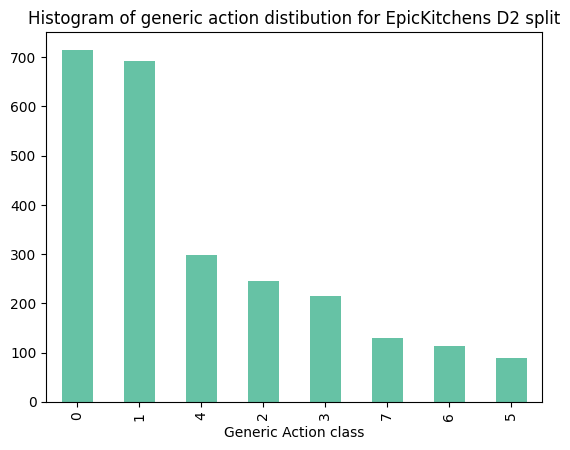

In [ ]:

D2['verb_class'].value_counts().plot(kind='bar',xlabel = 'Generic Action class',colormap = cmap,title = 'Histogram of generic action distibution for EpicKitchens D2 split')


<Axes: title={'center': 'Histogram of generic action distibution for EpicKitchens D1 split'}, xlabel='Generic Action class'>

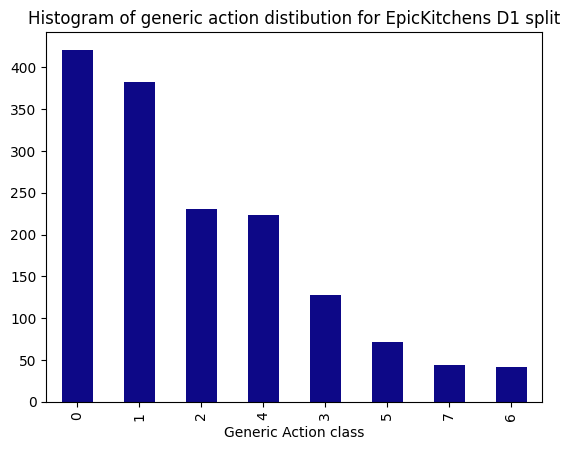

In [ ]:
D1['verb_class'].value_counts().plot(kind='bar',xlabel = 'Generic Action class',colormap = 'plasma',title = 'Histogram of generic action distibution for EpicKitchens D1 split')

<Axes: title={'center': 'Histogram of generic action distibution for EpicKitchens D3 split'}, xlabel='Generic Action class'>

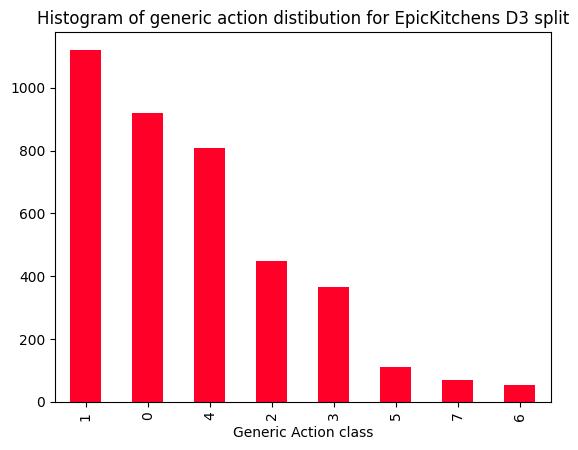

In [ ]:
D3['verb_class'].value_counts().plot(kind='bar',xlabel = 'Generic Action class',colormap = 'gist_rainbow',title = 'Histogram of generic action distibution for EpicKitchens D3 split')

In [ ]:
actionet = pd.read_pickle("/content/deep-learning-egovision/actionNet/S0401_train.pkl")

In [ ]:
actionet

<Axes: title={'center': 'Histogram of generic action distibution for ActionNet S04 split'}, xlabel='Generic Action class'>

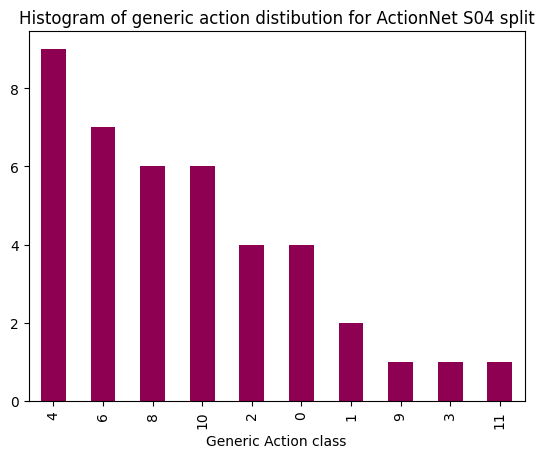

In [ ]:
actionet['verb_class'].value_counts().plot(kind='bar',xlabel = 'Generic Action class',colormap = 'PiYG',title = 'Histogram of generic action distibution for ActionNet S04 split')

In [ ]:
%%bash
## EMG_SPEC CNN training
python train_classifier.py name="MULTIMODAL_dense_5"\
  need_clips=False dataset.shift="S0401-S0401" dataset.annotations_path="actionNet"\
    dataset.RGB.features_name="MULTIMODAL_dense_5"\
        load_feat=True total_batch=16 batch_size=4 need_clips=False modality=["MULTIMODAL"]